### Gaussian Naive Bayes Classifier

Tests the implementation of the Gaussian Naive Bayes Classifier.
Author: fvilmos
https://github.com/fvilmos


Uses the iris dataset for demonstration purposes.
Please read data set details (source / creator / author) in the ./data/dataset_source.txt

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils.gaussian_naive_bayes import GaussianNaiveBayesClassifier

In [2]:
# load data
data_location = '.\\data\\iris.data'

dataset = np.loadtxt(data_location,delimiter=',',dtype=np.ndarray)

# format data
data_labels = dataset[:,-1]
data = dataset[:,0:4].astype(np.float)
data = np.hstack((np.array([data_labels]).T,data))

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print ("dataset shape:", dataset.shape, "labels:", len(labels))

dataset shape: (150, 5) labels: 3


GaussianNaiveBayesClassifier trained!



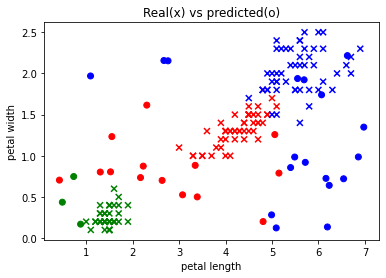

In [3]:
gnb = GaussianNaiveBayesClassifier(labels=labels, label_data_indx=0, feature_data_indx=[1,2,3,4], return_class_label=False)

# train
gnb.fit_data(data)
print ("GaussianNaiveBayesClassifier trained!\n")

dummy_data = []
real_data = []

for d in data:
    color = 'green'
    if d[0] == labels[1]:
        color = 'red'
    elif d[0] == labels[2]:
        color = 'blue'
        
    real_data.append([d[3],d[4],color])

real_data = np.array(real_data)

#Test
for i in range (35):
    fm = np.array([np.random.uniform(0.1,2.0,1),np.random.uniform(0.1,2.0,1),np.random.uniform(0.4,7.0,1),np.random.uniform(0.1,2.5,1)]).T[0]
    
    pred = gnb.predict(fm)
    # petal length, 2
    # petal width, 3
    color = 'green'
    if int(pred) == 1:
        color = 'red'
    elif int(pred) == 2:
        color = 'blue'
    dummy_data.append([fm[2],fm[3], color])
    
dummy_data = np.array(dummy_data)

# plot
plt.title("Real(x) vs predicted(o)")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.scatter(real_data[:,0].astype(np.float),real_data[:,1].astype(np.float), color=real_data[:,2],marker='x')
plt.scatter(dummy_data[:,0].astype(np.float),dummy_data[:,1].astype(np.float), color=dummy_data[:,2])
plt.savefig('./info/results.png')
plt.show()